# Sub-Analysis: Variation of Model Constants for a Circumbinary System

*A 488 Computational Astrophysics Project by Tyler Barna<sup>1</sup>*

<small><sup>1</sup>Department of Physics and Astronomy, Rutgers, the State University of New Jersey, New Brunswick</small>

## Dependencies

bottom text

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy import constants as const
from astropy import units as u
from gravSolve import df_Nbody as gs
from numpy import sqrt
from plotter import plotter
from scipy.integrate import odeint

%matplotlib inline

## 3-Body Problem

Since I'm only planning on using a 3 body simulation and I'd like to vary two different constants, I'm going to use our 

bottom text

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


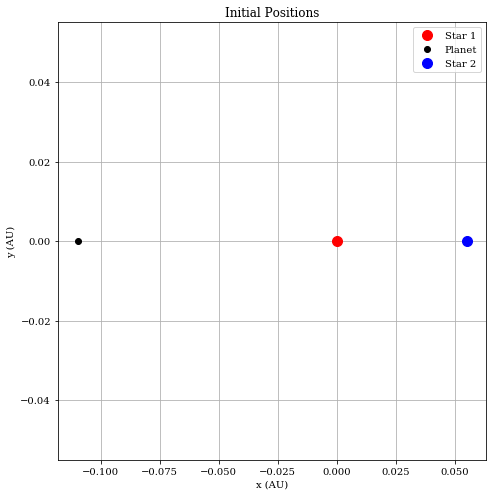

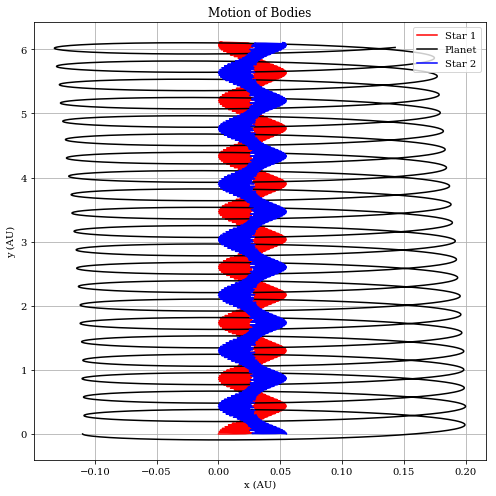

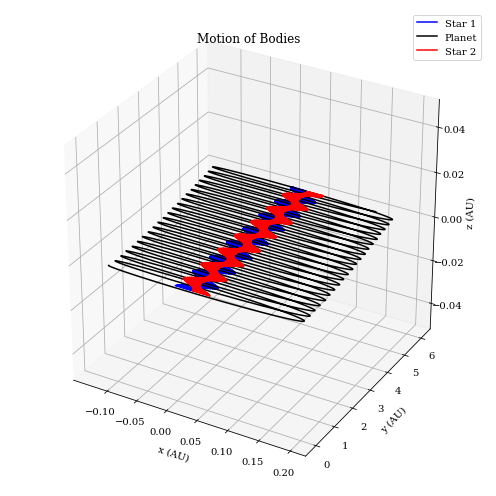

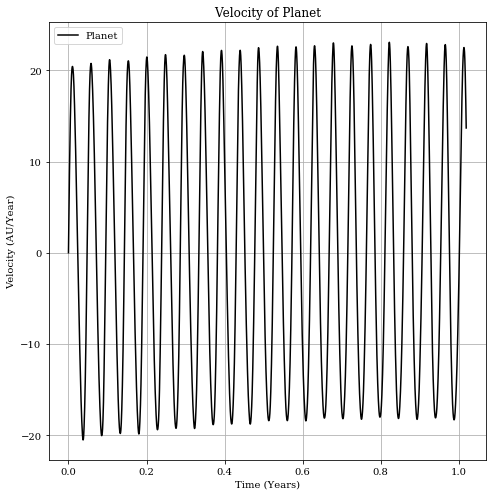

In [2]:
#print(const.G.value)
GConst = const.G.to('AU**3/Msun*yr**2').value
#print(GConst)
numP = 25 ## Number of periods to run each graphing

def threeBody(p=1, G=GConst, ϵ=0.001, n=3):
    ## Initial Conditions taken to be at apoapsis
    
    ## m1: first star; m2: planet; m3: second star; e: eccentricity; a: semi-major axis;
    
    m1 = 0.8
    m2 = 7.007369e-4
    m3 = 0.8
    e = 0.0 
    a = 0.110
    
     ## mc: central mass (first star and planet); M: total mass; μ: reduced mass
    
    mc = m1 + m2
    M = m1 + m2 + m3
    μ = (m1*m2)/mc
    μPrime = (mc*m3)/M
    
    P = 2.0 * np.pi * sqrt( (a**3) / (G * mc) )
    PPrime = 2.0 * np.pi * sqrt( (a**3) / (G * M) )
    
    ticity = sqrt( G * mc * a * ( 1 - e**2 ) )
    ticityPrime = sqrt( G * M * a * ( 1 - e**2 ) )
    
    r_a = a*(1+e)
    v_a = ticity/r_a
    v_aPrime = ticityPrime/r_a
    
    a1 = (r_a*μ)/m1
    a2 = (r_a*μ)/m2
    a3 = (r_a*μPrime)/m3
    vy1 = (v_a*μ)/m1
    vy2 = (v_a*μ)/m2
    vy3 = (v_aPrime*μPrime)/m3
    
    r1 = [a1,0,0]
    r2 = [-a2,0,0]
    r3 = [a3,0,0]
    v1 = [0,vy1,0]
    v2 = [0,-vy2,0]
    v3 = [0,vy3,0]
    
    m = np.array([m1,m2,m3])
    init_cond = np.array([r1,r2,r3,v1,v2,v3]).flatten()
    tarr = np.linspace(0.0, p*P, 4e3)
    res = odeint(gs, init_cond, tarr, args = (m,G,ϵ))
    
    plotter(res, 1,1,1, a3, proj=n, tarr=tarr)
    return

threeBody(p=numP, n=0)
threeBody(p=numP, n=2)
threeBody(p=numP, n=3)
threeBody(p=numP, n=4)

## Varying the Universal Gravitational Constant

Despite traditionally being accepted as a constant value, various studies since 1962 have derived values of G that have disparities greater than their uncertainties. According to a 2015 paper by Anderson et. al, it is possible that G varies with time periodcially, with an estimated amplitude of  $1.619 \pm 0.103 \times 10^{-14} \: \mathrm{ m^{3} kg^{-1} s^{-2} } $. This has potentially novel implications for the stability of this circumbinary orbit.

In [3]:
low = (1.619e-14 - 0.103e-14) * ( u.m**3 * u.kg**(-1) * u.s**(-2) )
low = low.to('AU**3/Msun*yr**2').value
print('low: ',low)

exact = (1.619e-14) * ( u.m**3 * u.kg**(-1) * u.s**(-2) )
exact = exact.to('AU**3/Msun*yr**2').value
print('exact: ',exact)

high = (1.619e-14 + 0.103e-14) * ( u.m**3 * u.kg**(-1) * u.s**(-2) )
high = high.to('AU**3/Msun*yr**2').value
print('high: ',high)

GminLow = GConst - low
GminEx = GConst - exact
print('GConst - GMinEx: ',GConst-GminEx)
GminHigh = GConst - high

GmaxLow = GConst + low
GmaxEx = GConst + exact
print('GmaxEx - GConst',GmaxEx-GConst)
GmaxHigh = GConst + high

low:  0.008967081670565652
exact:  0.009576322707549993
high:  0.010185563744534333
GConst - GMinEx:  0.009576322707552265
GmaxEx - GConst 0.009576322707552265


### Minimum Value of G

Minimum Value of G: Lower Bound


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


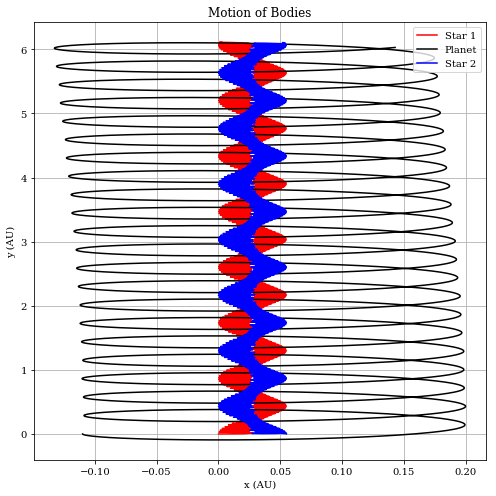

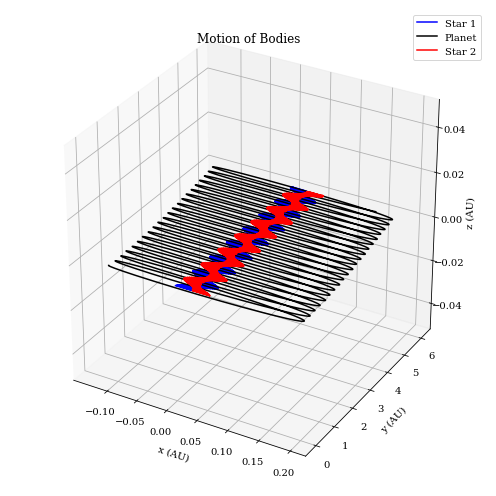

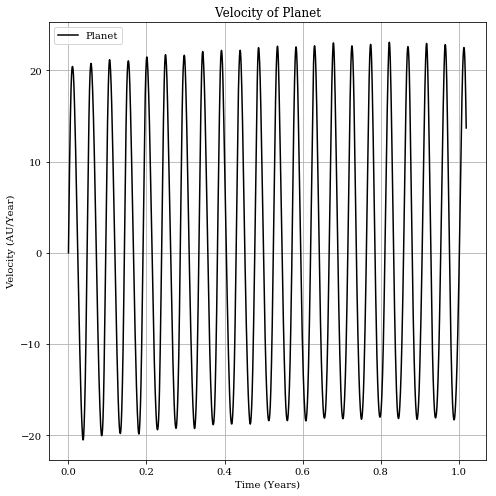



Minimum Value of G: Mean Value


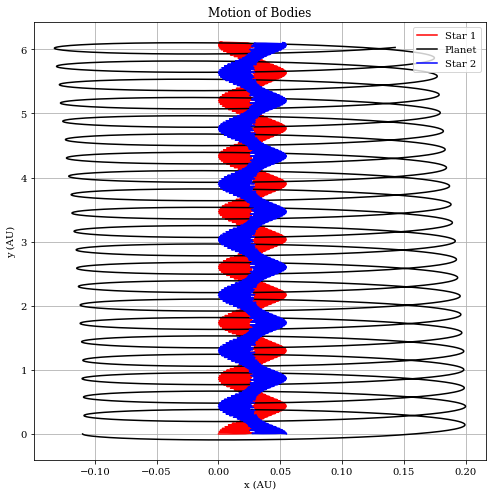

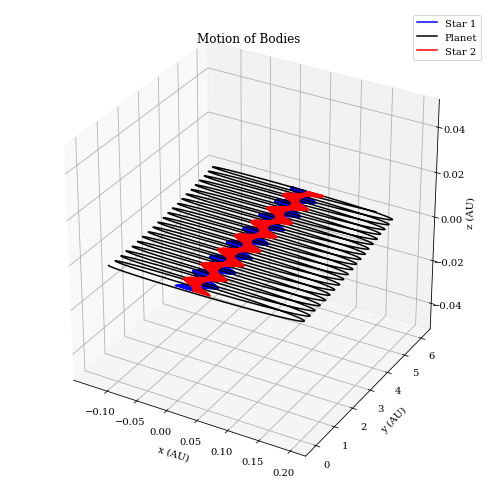

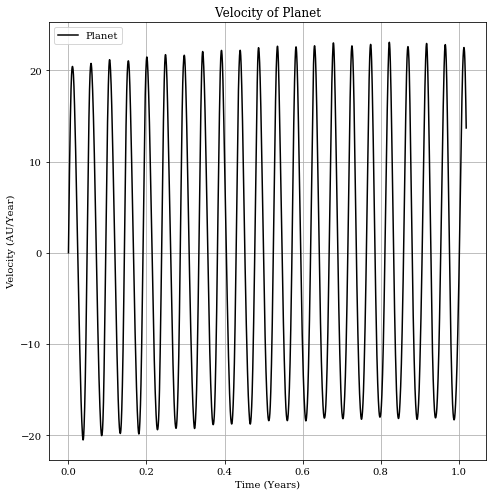



Minimum Value of G: Upper Bound


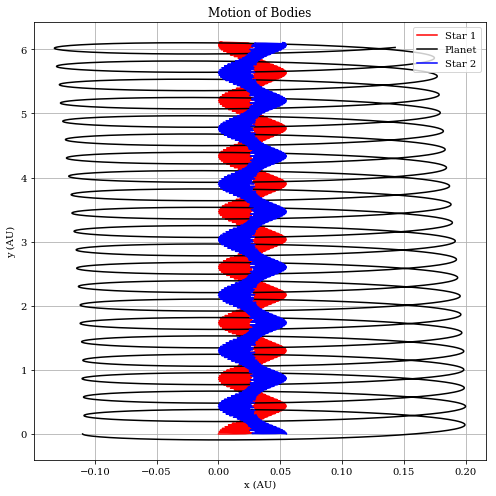

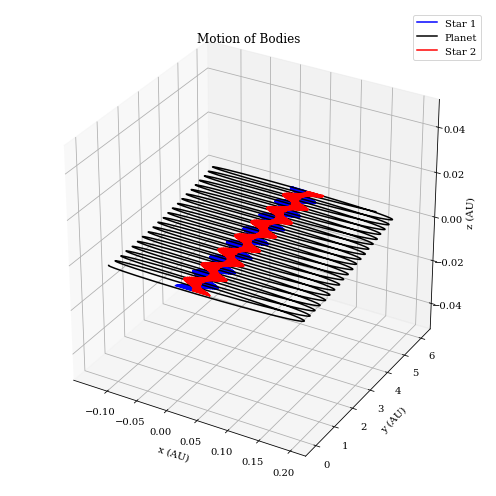

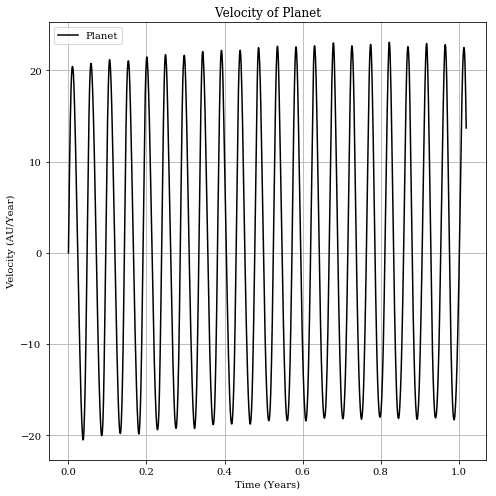

In [4]:
print("Minimum Value of G: Lower Bound")
threeBody(p=numP, G=GminLow, n=2)
threeBody(p=numP, G=GminLow, n=3)
threeBody(p=numP, G=GminLow, n=4)
print("\n")
print("Minimum Value of G: Mean Value")
threeBody(p=numP, G=GminEx, n=2)
threeBody(p=numP, G=GminEx, n=3)
threeBody(p=numP, G=GminEx, n=4)
print("\n")
print("Minimum Value of G: Upper Bound")
threeBody(p=numP, G=GminHigh, n=2)
threeBody(p=numP, G=GminHigh, n=3)
threeBody(p=numP, G=GminHigh, n=4)

### Maximum Value of G

Maximum Value of G: Lower Bound


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


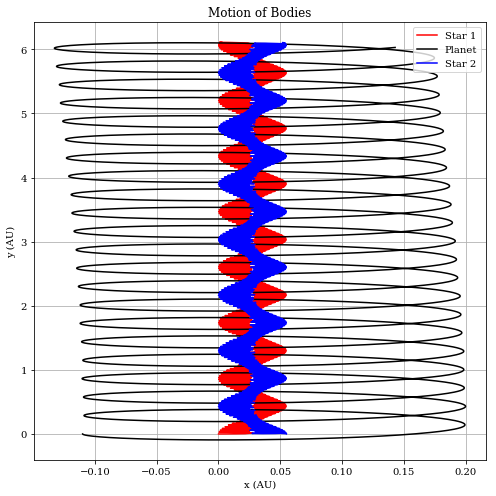

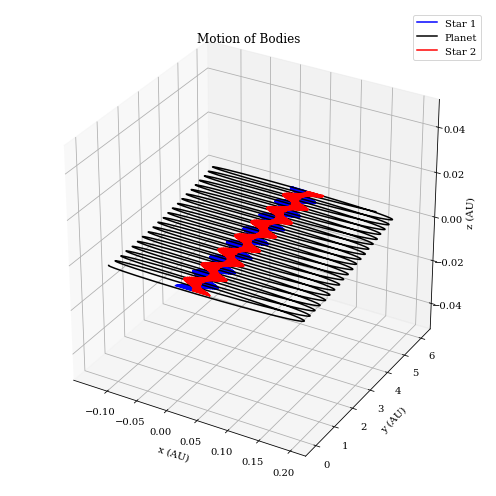

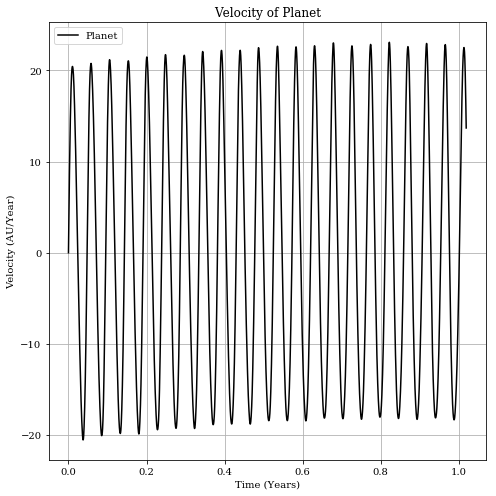



Maximum Value of G: Mean Value


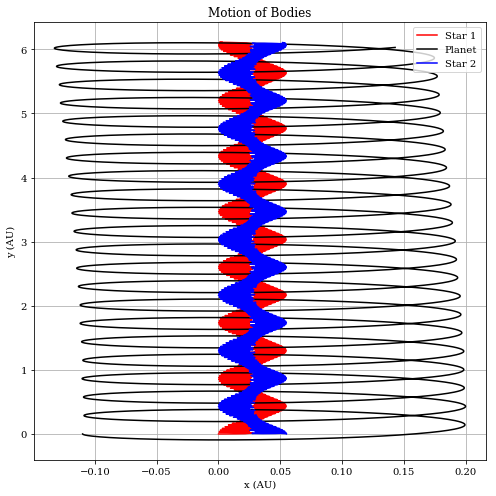

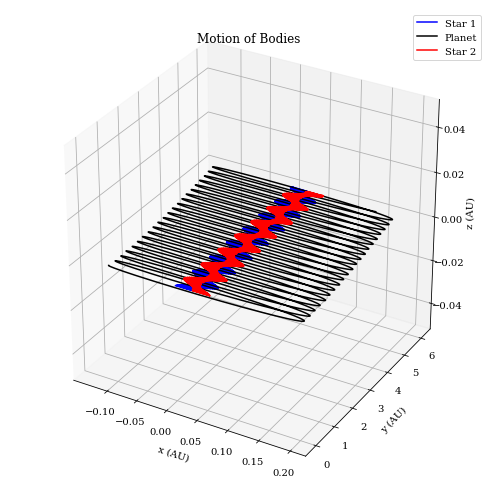

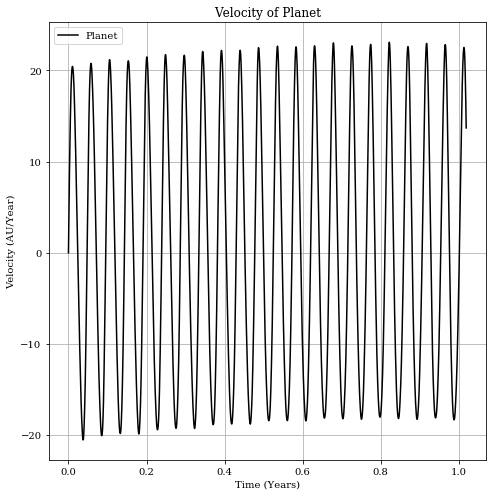



Maximum Value of G: Upper Bound


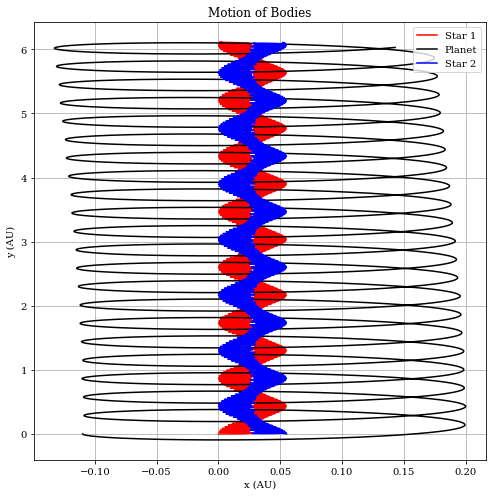

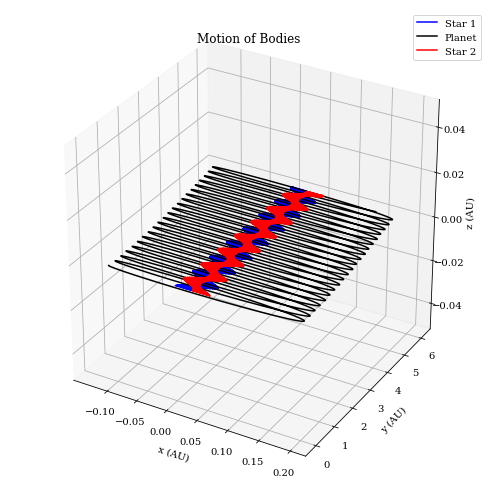

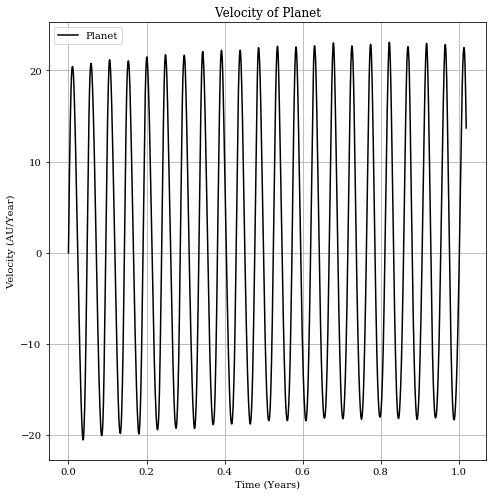

In [5]:
print("Maximum Value of G: Lower Bound")
threeBody(p=numP, G=GmaxLow, n=2)
threeBody(p=numP, G=GmaxLow, n=3)
threeBody(p=numP, G=GmaxLow, n=4)
print("\n")
print("Maximum Value of G: Mean Value")
threeBody(p=numP, G=GmaxEx, n=2)
threeBody(p=numP, G=GmaxEx, n=3)
threeBody(p=numP, G=GmaxEx, n=4)
print("\n")
print("Maximum Value of G: Upper Bound")
threeBody(p=numP, G=GmaxHigh, n=2)
threeBody(p=numP, G=GmaxHigh, n=3)
threeBody(p=numP, G=GmaxHigh, n=4)

### Varying the Universal Gravitational Constant: Conclusions



## Varying the Smoothing Length

bottom text

### Case 1: $\epsilon = 0$ ($\epsilon_{orig}\times 0$)

Setting $\epsilon = 0$ breaks the model, which makes sense; $\epsilon$ is used to prevent numierical divergences

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\Users\Tyler\Documents\GitHub\Project-2-Exoplanets\gravSolve.py:23: RuntimeWarning: invalid value encountered in true_divide
  bracketx = Dx*G/((ϵ**2+Dx**2+Dy**2+Dz**2)**(3/2))
C:\Users\Tyler\Documents\GitHub\Project-2-Exoplanets\gravSolve.py:26: RuntimeWarning: invalid value encountered in true_divide
  brackety = Dy*G/((ϵ**2+Dx**2+Dy**2+Dz**2)**(3/2))
C:\Users\Tyler\Documents\GitHub\Project-2-Exoplanets\gravSolve.py:29: RuntimeWarning: invalid value encountered in true_divide
  bracketz = Dz*G/((ϵ**2+Dx**2+Dy**2+Dz**2)**(3/2))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tra

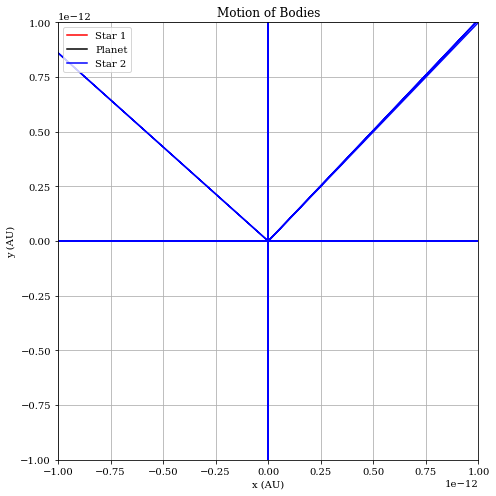

C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\axis3d.py:285: RuntimeWarning: overflow encountered in add
  lxyz = 0.5*(edgep1 + edgep2)
C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:141: RuntimeWarning: invalid value encountered in double_scalars
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w
posx and posy should be finite values
posx and posy should be finite values
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\ticker.py:1919: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\ticker.py:1729: RuntimeWarning: overflow encountered in double_scalars
  return (d + 1) * self._base


ValueError: Maximum allowed size exceeded

<Figure size 504x504 with 1 Axes>

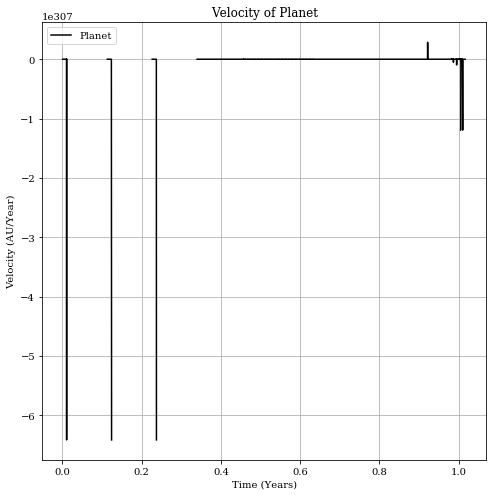

In [6]:
threeBody(p=numP, ϵ=0, n=2)
threeBody(p=numP, ϵ=0, n=3)
threeBody(p=numP, ϵ=0, n=4)

### Case 2: $\epsilon = 0.00001$ ($\frac{ \epsilon_{orig} }{100}$)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


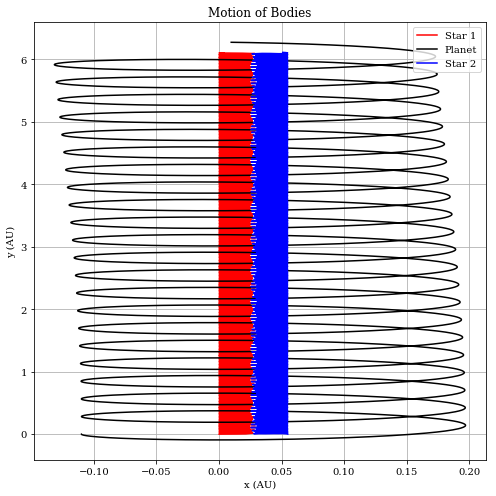

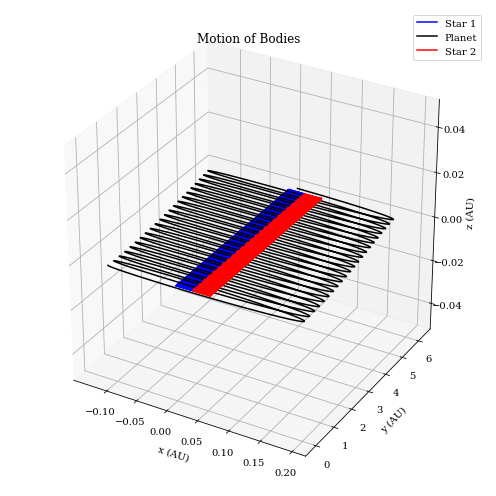

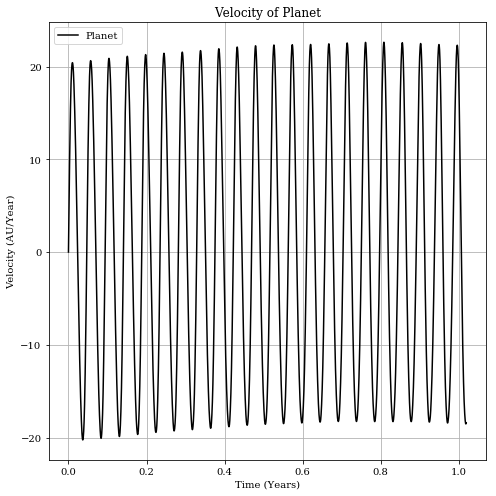

In [7]:
threeBody(p=numP, ϵ=0.00001, n=2)
threeBody(p=numP, ϵ=0.00001, n=3)
threeBody(p=numP, ϵ=0.00001, n=4)

### Case 3: $\epsilon = 0.0001$ ($\frac{ \epsilon_{orig} }{10}$)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


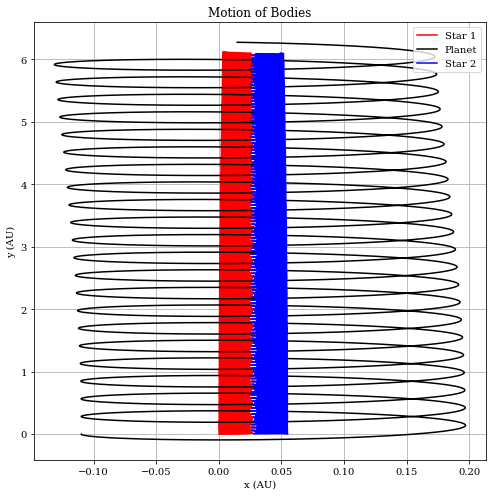

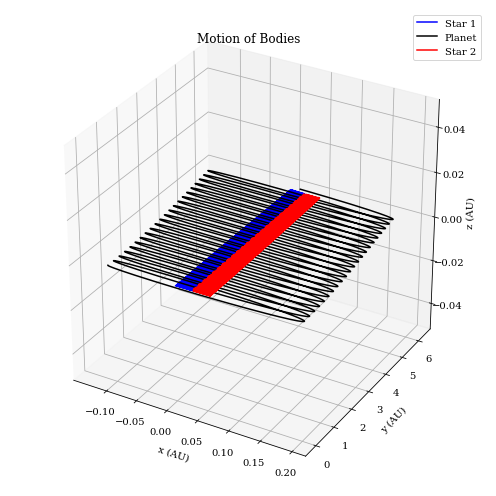

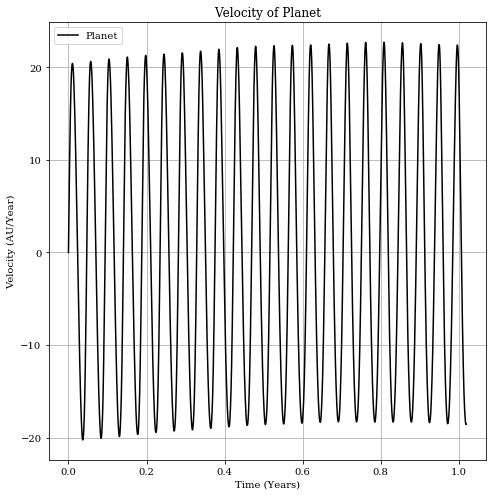

In [8]:
threeBody(p=numP, ϵ=0.0001, n=2)
threeBody(p=numP, ϵ=0.0001, n=3)
threeBody(p=numP, ϵ=0.0001, n=4)

### Case 4: $\epsilon = 0.01$ ($\epsilon_{orig}\times 10$)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


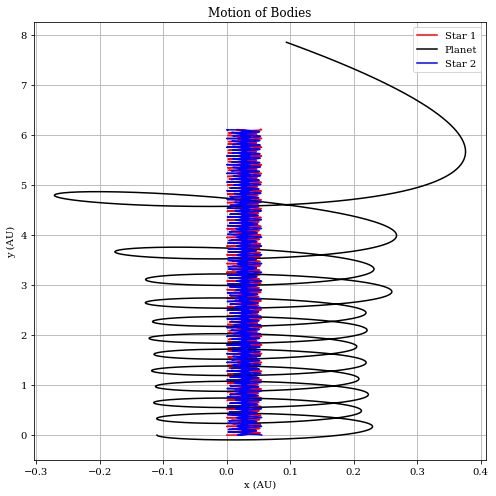

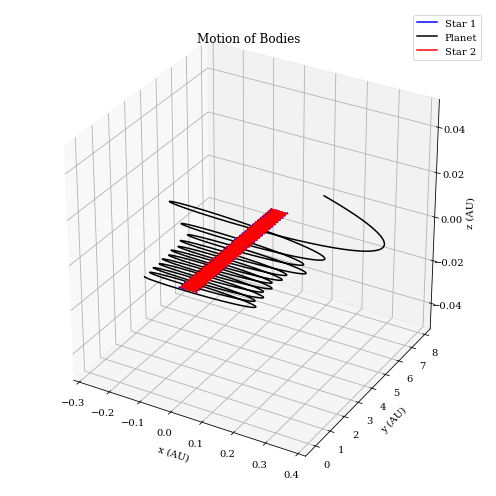

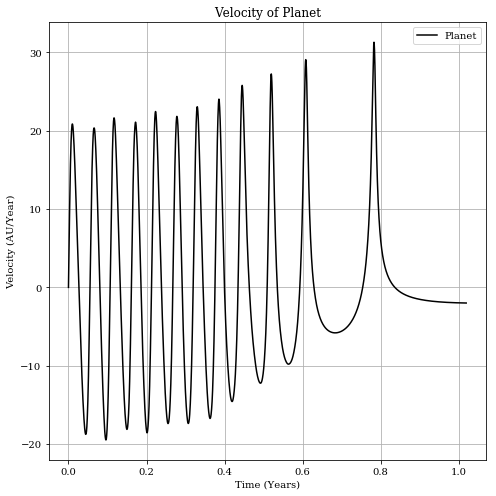

In [9]:
threeBody(p=numP, ϵ=0.01, n=2)
threeBody(p=numP, ϵ=0.01, n=3)
threeBody(p=numP, ϵ=0.01, n=4)

### Case 5: $\epsilon = 0.05$ ($\epsilon_{orig}\times 50$)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


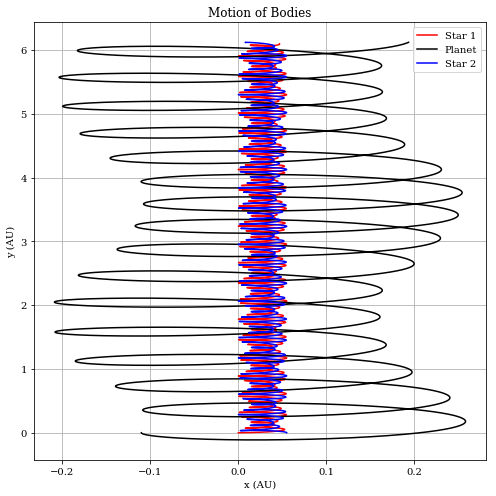

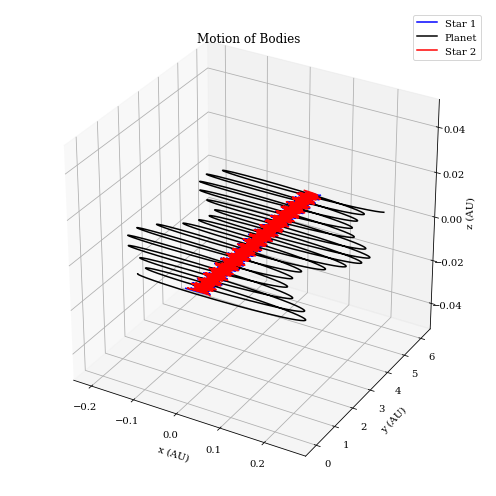

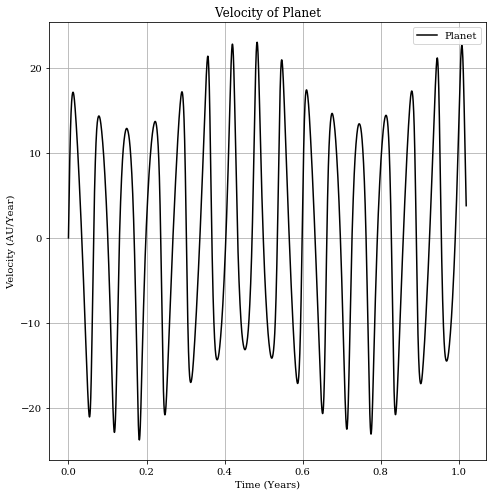

In [10]:
threeBody(p=numP, ϵ=0.05, n=2)
threeBody(p=numP, ϵ=0.05, n=3)
threeBody(p=numP, ϵ=0.05, n=4)

### Case 6: $\epsilon = 0.1$ ($\epsilon_{orig}\times 100$)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


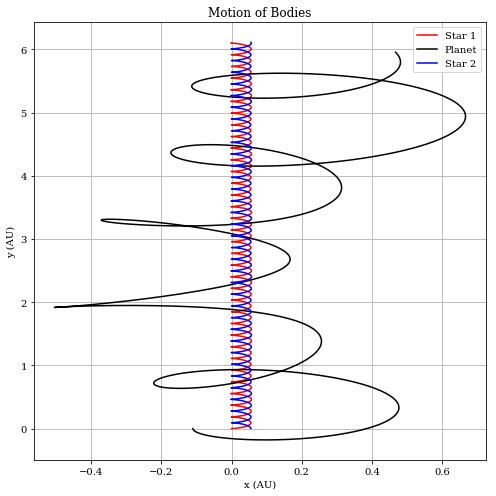

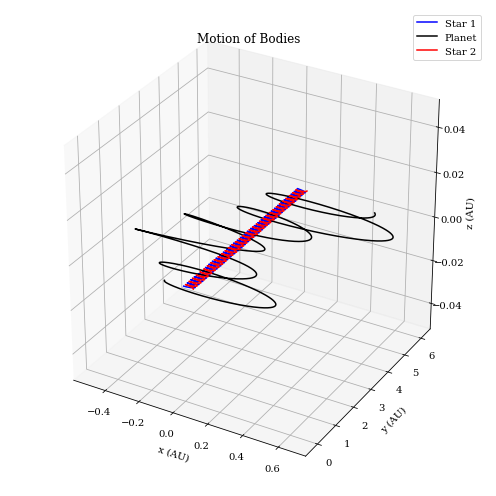

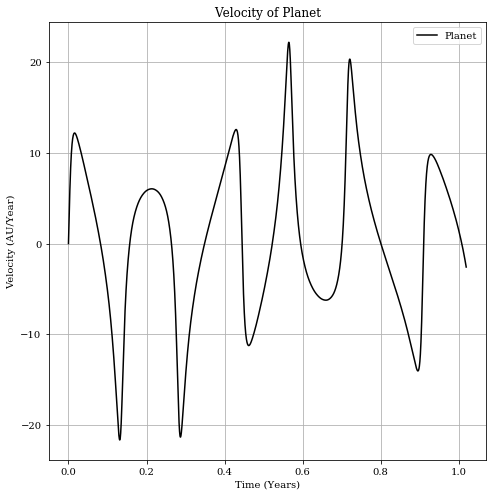

In [11]:
threeBody(p=numP, ϵ=0.1, n=2)
threeBody(p=numP, ϵ=0.1, n=3)
threeBody(p=numP, ϵ=0.1, n=4)

### Case 7: $\epsilon = 1.0$ ($\epsilon_{orig}\times 1000$)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


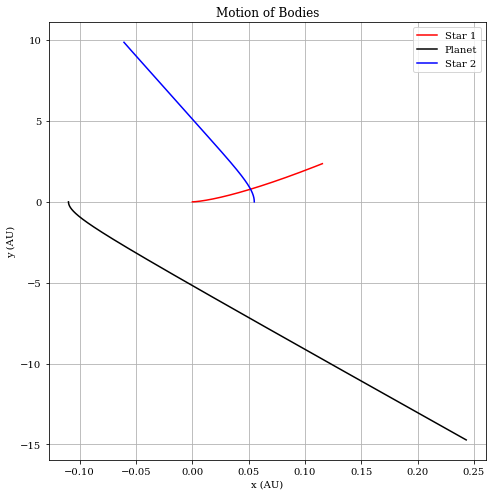

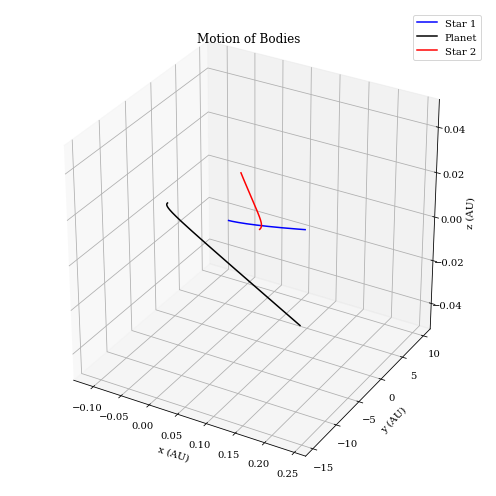

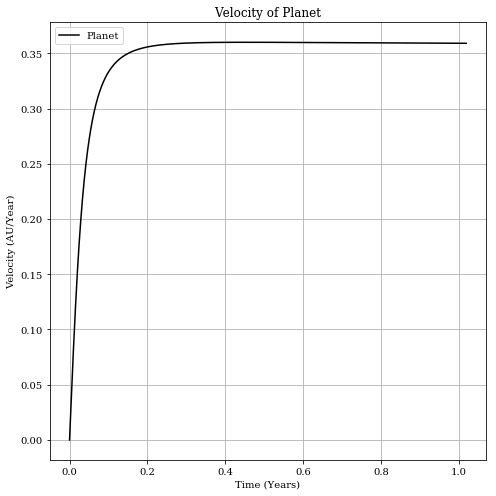

In [12]:
threeBody(p=numP, ϵ=1.0, n=2)
threeBody(p=numP, ϵ=1.0, n=3)
threeBody(p=numP, ϵ=1.0, n=4)